        Group 5
    >> Aguanta, Jeselle
    >> Andam, Jhun Brian
    >> Ramas, Juamalida
    >> Yramis, Neil Steven
___

## Modules

In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn import utils
import numpy as np
from sklearn.model_selection import cross_val_score

# Problem

Cell phone use has become an integral aspect of everyone's lives, particularly with the rise of texting. People use their phones to communicate with friends and parents, particularly for online programs. The goal behind the categorization of mobile costs is to learn more about the prices and quality of phones, particularly for those who are unfamiliar with how to classify phones and how it may assist people in purchasing the best phones for them that are both affordable and long-lasting.

# Three Highlights of the results

* The optimal value of k, which is `11` will be used as the basis for predicting new instances.
* RAM contributed significantly to the accuracy of mobile phone price predictions, thus make it an important feature.
* Testing accuracy of 93.5% can be considered a high score for this learning algorithm, but there is only one point among the 30 `k` trials that obtained the highest score, this might affect the algorithm because there's only one specific point, thus we must only be specific to that as the value of k for the succeeding tests.

# Data Discussion

The Dataset is provided and uploaded in kaggle by <i><b>Abhishek Sharma</b></i> 4 years ago, the dataset is a  multiclass classification problem that is related to business, it contains records of mobile phone features and their price ranges.<br>
The table below describes each variable of the dataset.
___
| Variable | Description |
| --- | --- |
| battery_power | Total energy a battery can store in one time measured in mAh. |
| blue | Has bluetooth or not. |
| clock_speed | speed at which microprocessor executes instructions. |
| dual_sim | Has dual sim support or not. |
| fc | Front Camera mega pixels. |
| four_g | Has 4G or not. |
| int_memory | Internal Memory in Gigabytes. |
| m_dep | Mobile Depth in cm. |
| mobile_wt | Weight of mobile phone. |
| n_cores | Number of cores of processor. |
| pc | Primary Camera mega pixels. |
| px_height | Pixel Resolution Height. |
| px_width | Pixel Resolution Width. |
| ram | Random Access Memory in Mega Byte. |
| sc_h | Screen Height of mobile in cm. |
| sc_w | Screen Width of mobile in cm. |
| talk_time | longest time that a single battery charge will last when you are. |
| three_g | Has 3G or not. |
| touch_screen | Has touch screen or not. |
| wifi | Has wifi or not. |
| price_range | This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost). |

In [2]:
df = pd.read_csv('train.csv')
df.head()
# we only used the train.csv because test.csv does not contain the price_range
# which is the class, it is necessary in order for us to assess if the model
# is having a good prediction and evaluation.

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [3]:
df.info()
# the dataset has no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

## EDA
<a id='univar'></a>

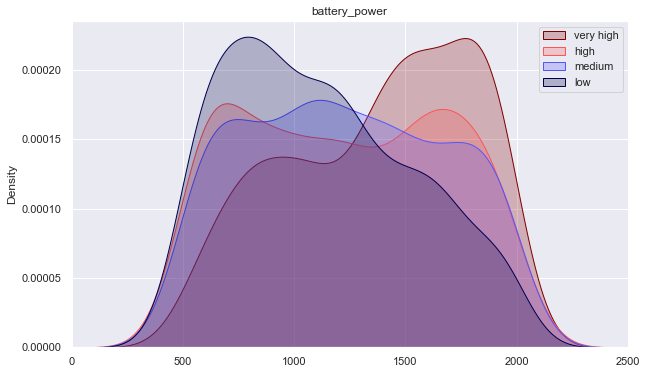

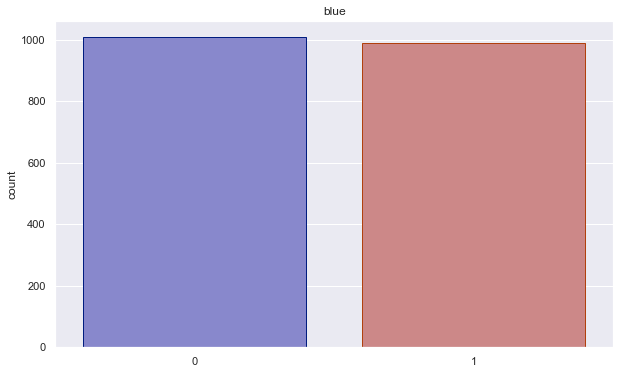

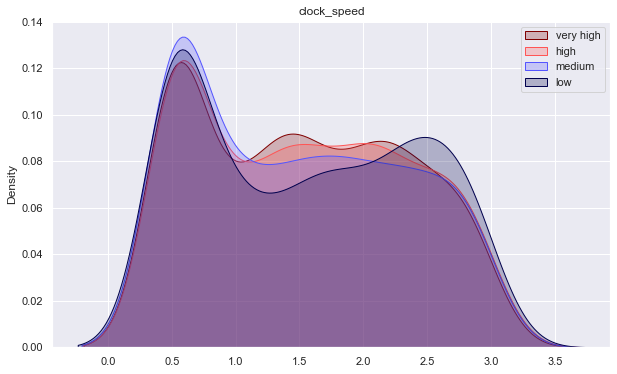

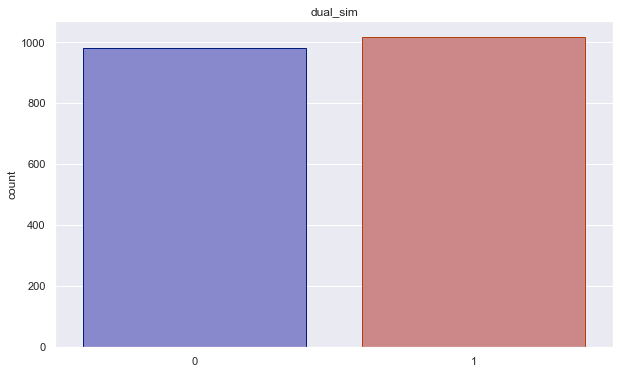

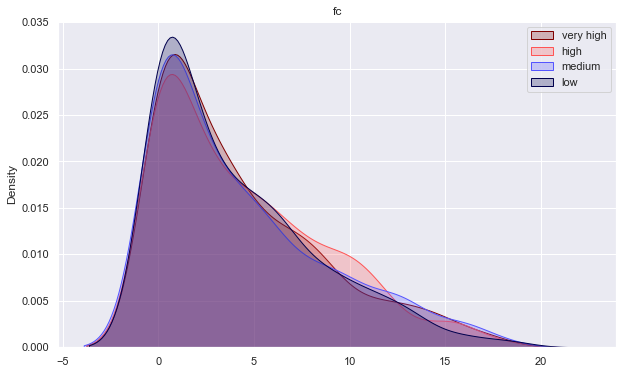

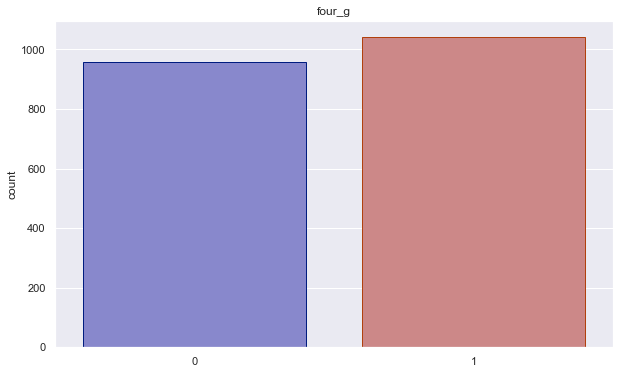

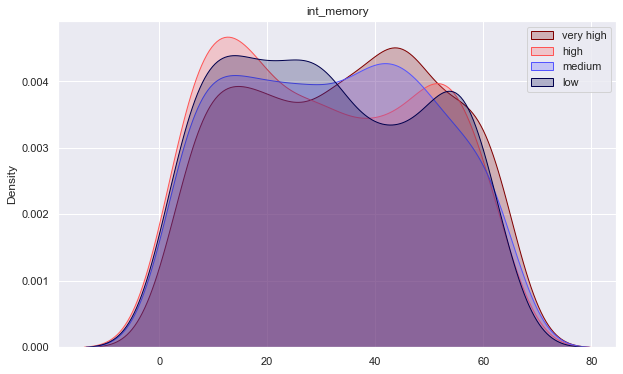

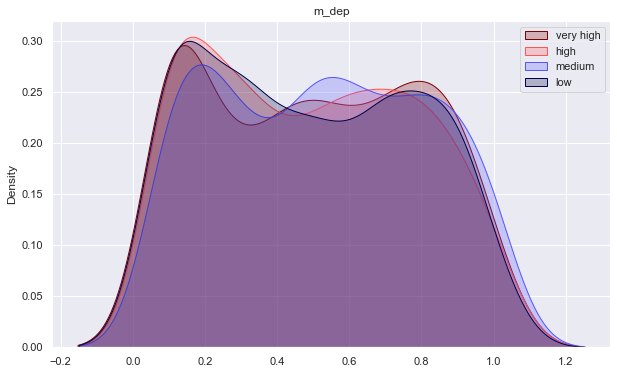

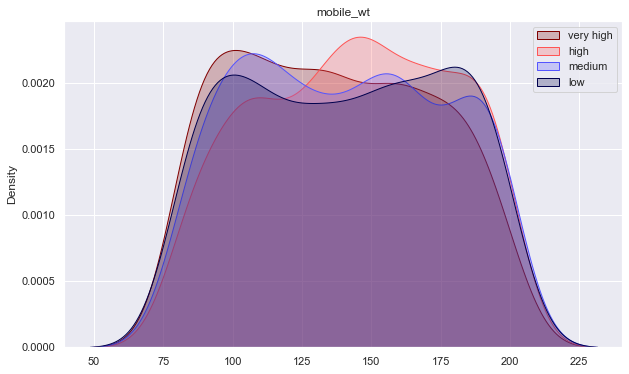

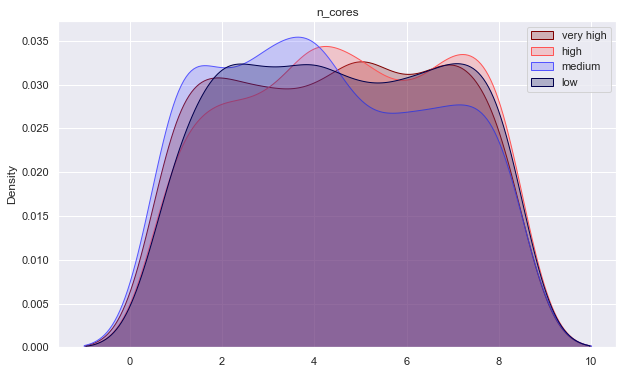

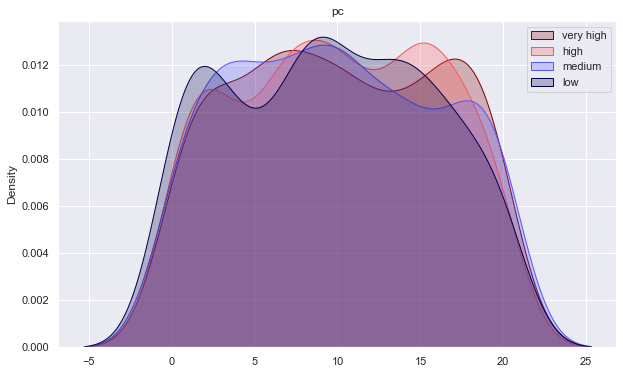

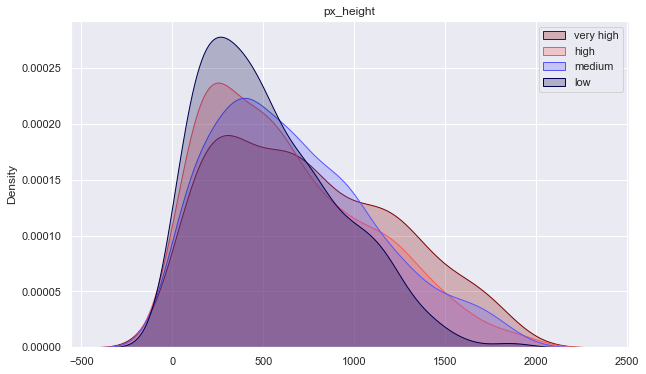

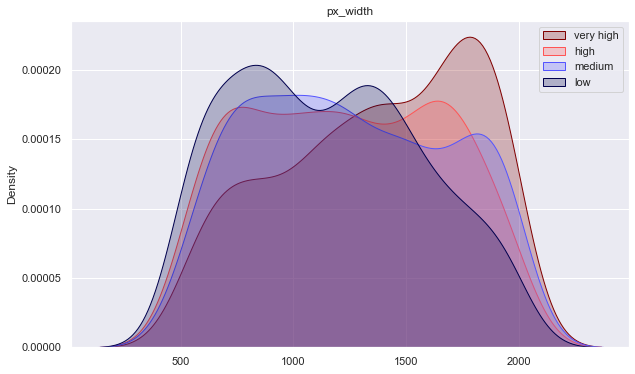

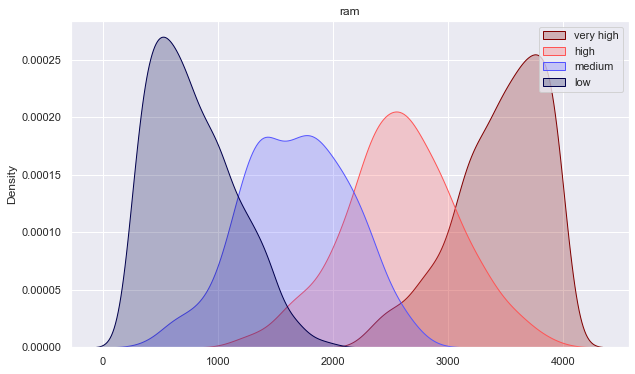

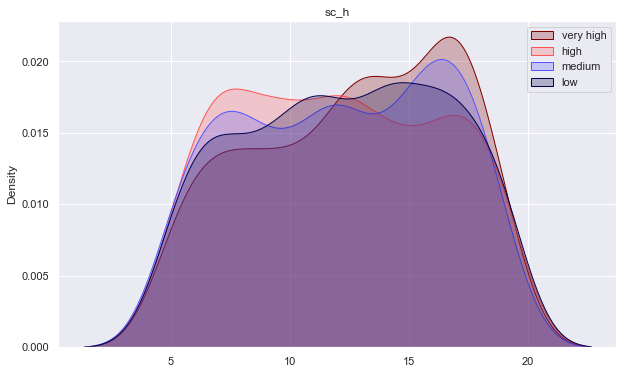

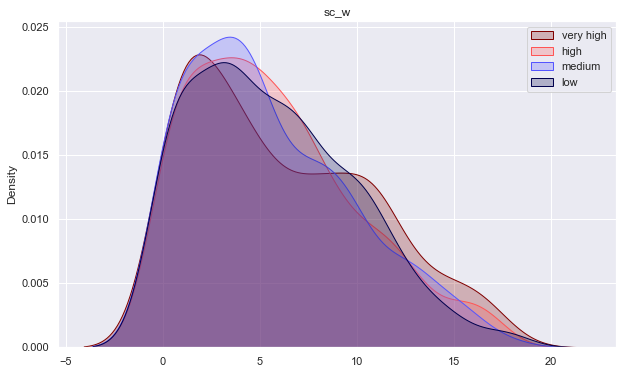

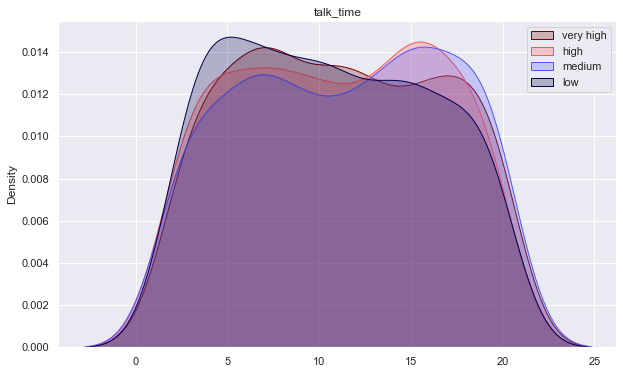

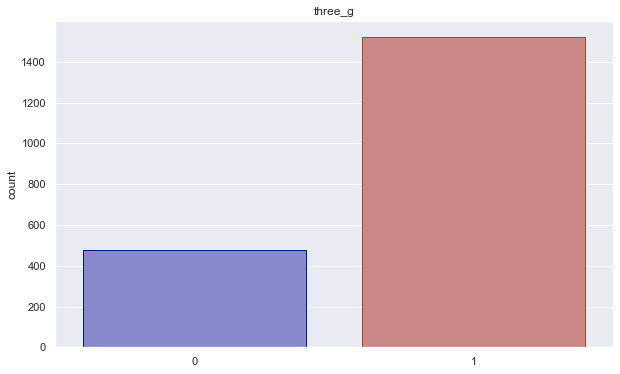

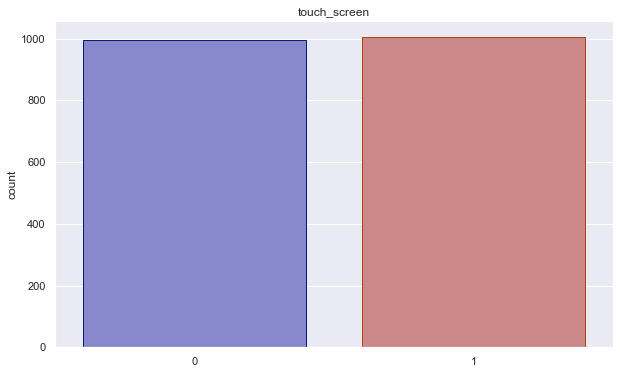

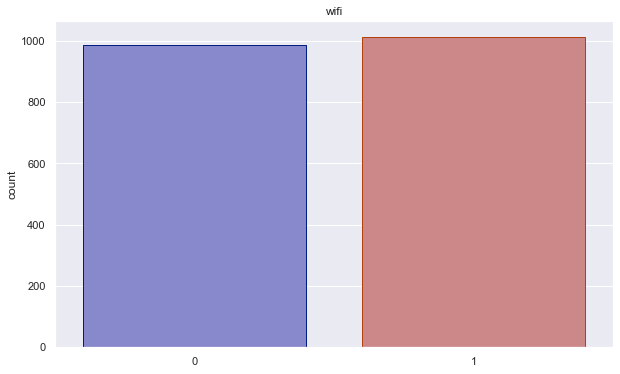

In [4]:
sns.set(rc={'figure.figsize':(10,6)})
for i in df.columns[:-1]:
    if df[i].nunique() > 2:
        sns.kdeplot(x=df[i], shade=True, hue=df['price_range'], palette='seismic')
        plt.title(f'{i}')
        plt.xlabel(None)
        plt.legend(["very high","high","medium","low"])
        plt.show();
    else:
        sns.countplot(x=df[i],saturation=0.4, 
                      palette='seismic', 
                      edgecolor=sns.color_palette("dark", 3))
        plt.title(f'{i}')
        plt.xlabel(None)
        plt.show();

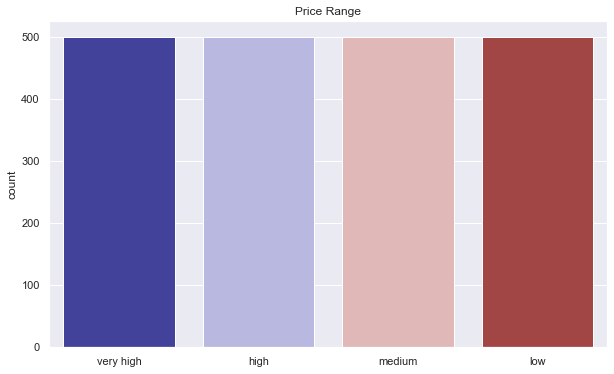

In [5]:
a = sns.countplot(x=df['price_range'],saturation=0.4, 
                  palette='seismic')
a.set_xticklabels(["very high","high","medium","low"])
plt.title(f'Price Range')
plt.xlabel(None)
plt.show();
# The dataset has balanced frequency of each class.

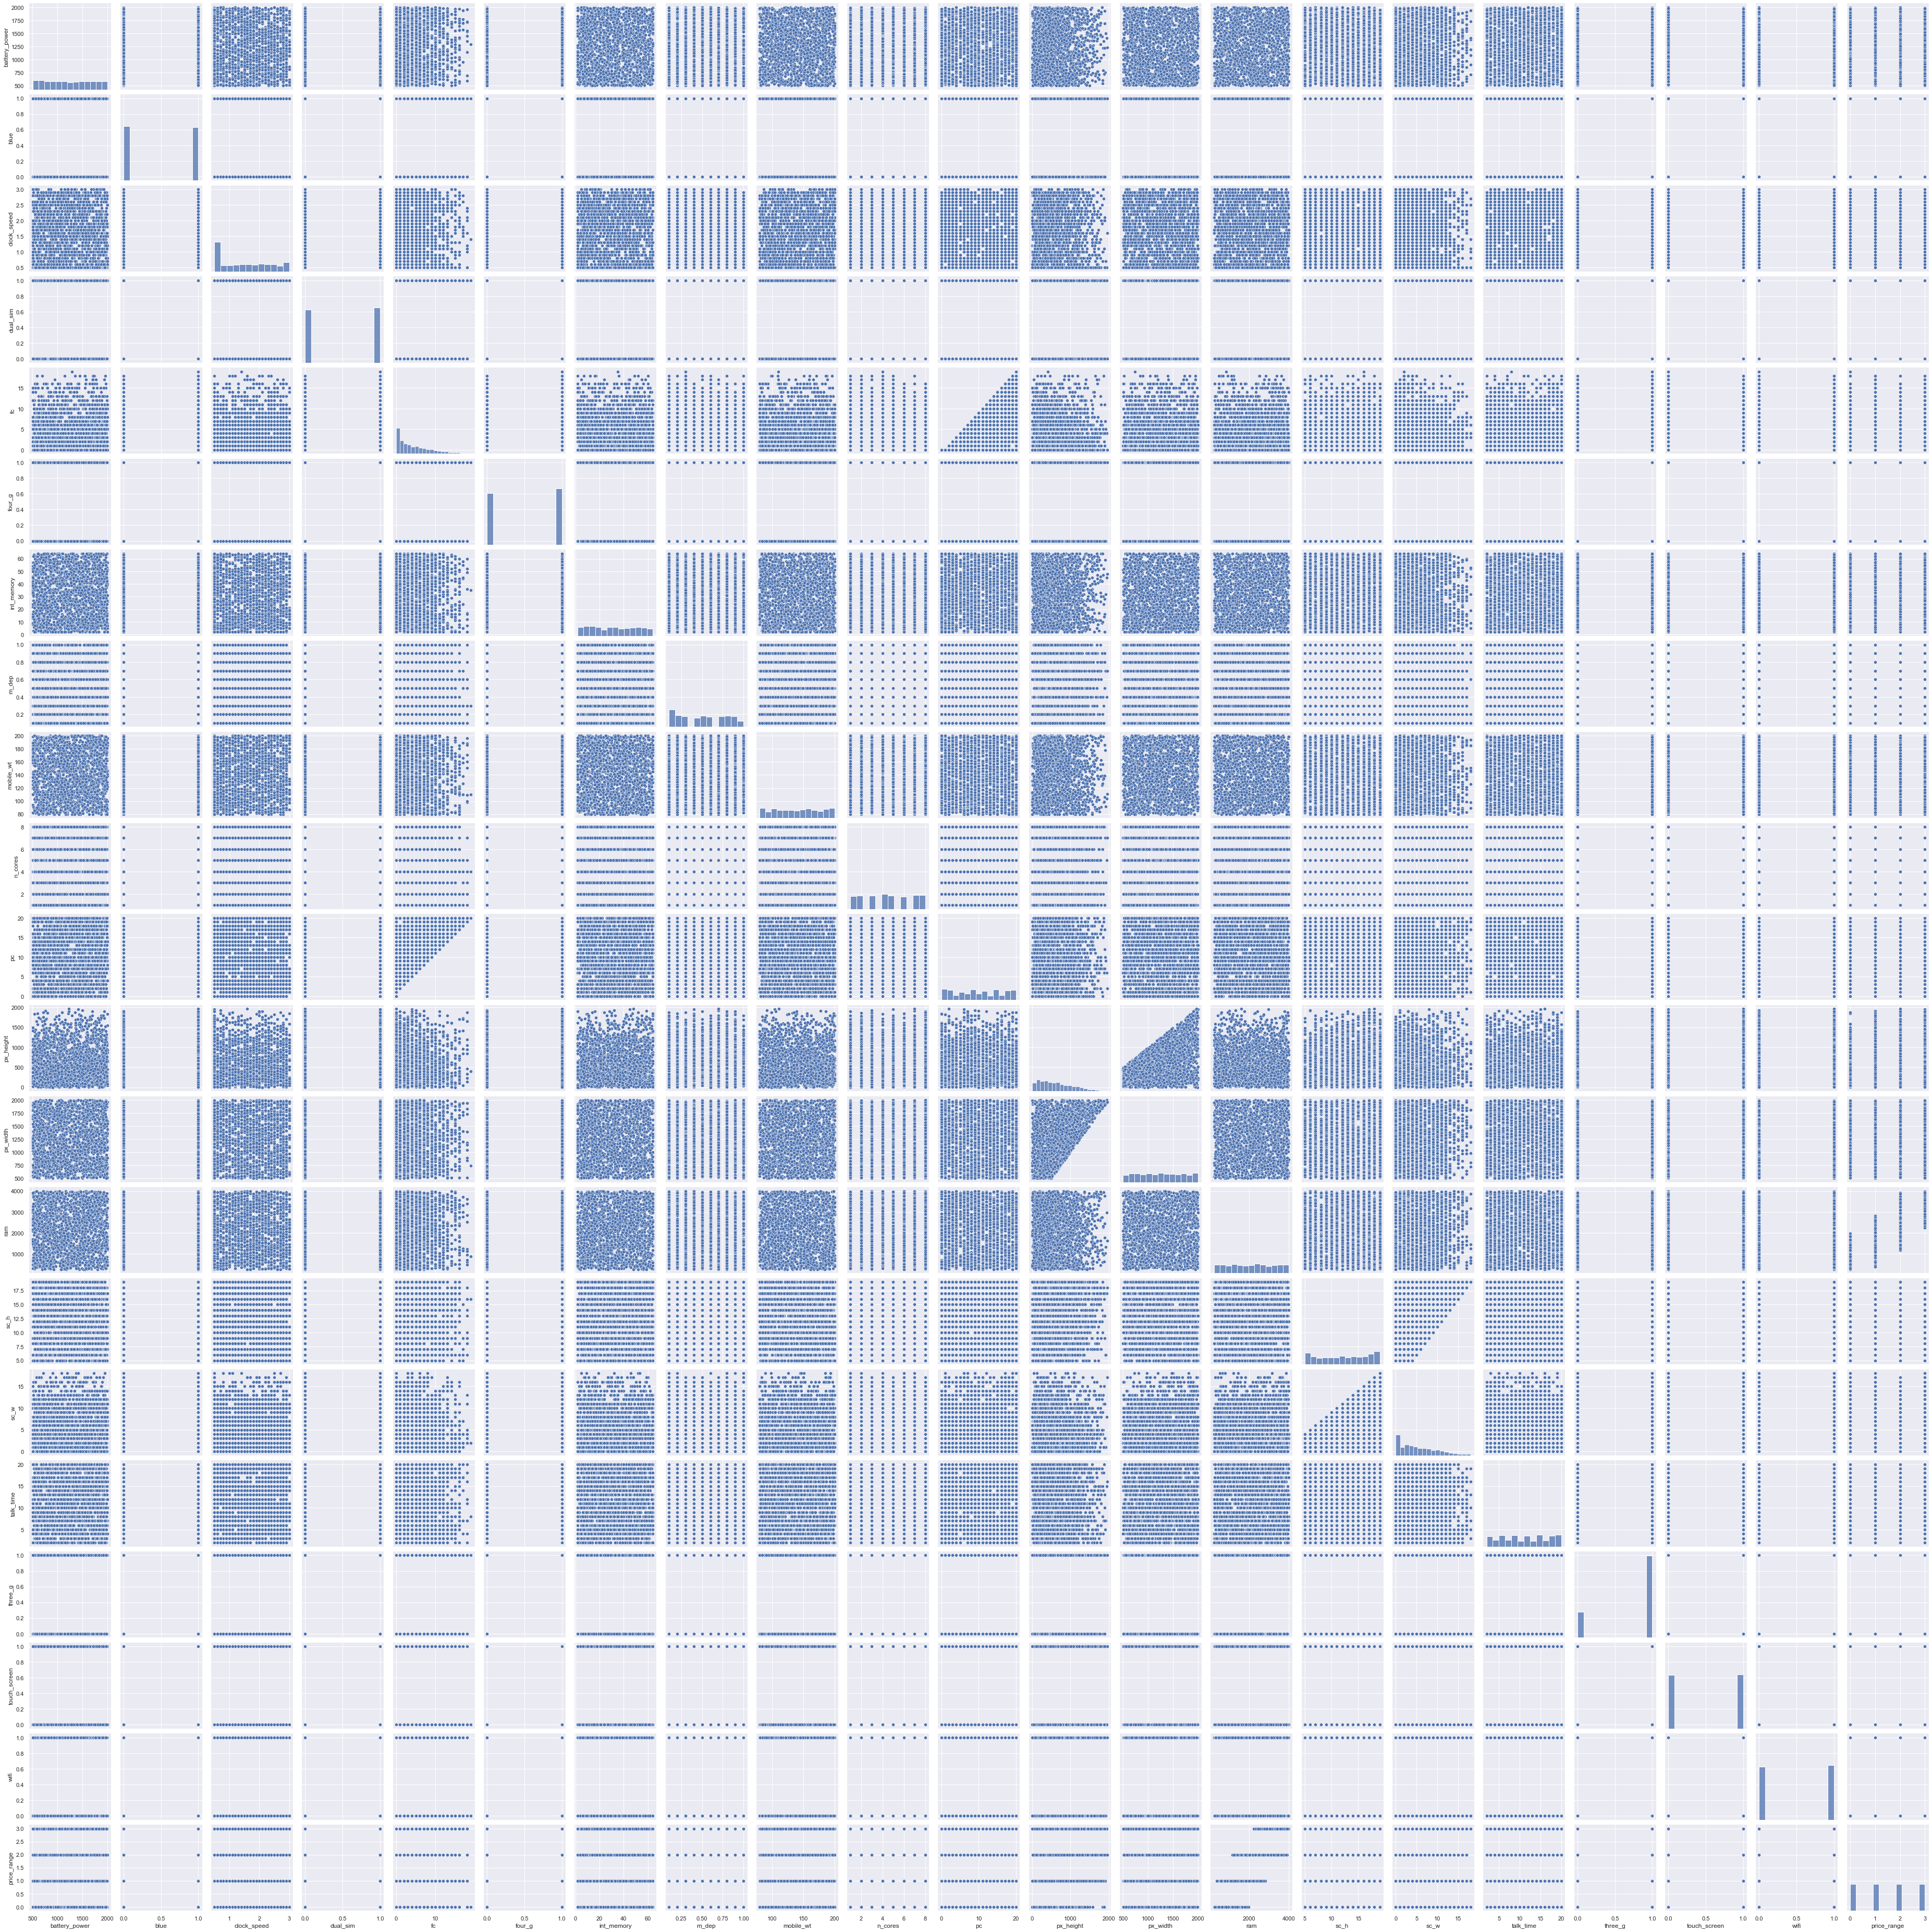

In [6]:
sns.pairplot(data=df, palette='seismic');
# -_-

In [7]:
df.describe().T

count        mean          std    min      25%     50%  \
battery_power  2000.0  1238.51850   439.418206  501.0   851.75  1226.0   
blue           2000.0     0.49500     0.500100    0.0     0.00     0.0   
clock_speed    2000.0     1.52225     0.816004    0.5     0.70     1.5   
dual_sim       2000.0     0.50950     0.500035    0.0     0.00     1.0   
fc             2000.0     4.30950     4.341444    0.0     1.00     3.0   
four_g         2000.0     0.52150     0.499662    0.0     0.00     1.0   
int_memory     2000.0    32.04650    18.145715    2.0    16.00    32.0   
m_dep          2000.0     0.50175     0.288416    0.1     0.20     0.5   
mobile_wt      2000.0   140.24900    35.399655   80.0   109.00   141.0   
n_cores        2000.0     4.52050     2.287837    1.0     3.00     4.0   
pc             2000.0     9.91650     6.064315    0.0     5.00    10.0   
px_height      2000.0   645.10800   443.780811    0.0   282.75   564.0   
px_width       2000.0  1251.51550   432.199447  500.0   874.75  1247.0   
ram            2000.0  2124.21300  1084.732044  256.0  1207.50  2146.5   
sc_h           2000.0    12.30650     4.213245    5.0     9.00    12.0   
sc_w           2000.0     5.76700     4.356398    0.0     2.00     5.0   
talk_time      2000.0    11.01100     5.463955    2.0     6.00    11.0   
three_g        2000.0     0.76150     0.426273    0.0     1.00     1.0   
touch_screen   2000.0     0.50300     0.500116    0.0     0.00     1.0   
wifi           2000.0     0.50700     0.500076    0.0     0.00     1.0   
price_range    2000.0     1.50000     1.118314    0.0     0.75     1.5   

                   75%     max  
battery_power  1615.25  1998.0  
blue              1.00     1.0  
clock_speed       2.20     3.0  
dual_sim          1.00     1.0  
fc                7.00    19.0  
four_g            1.00     1.0  
int_memory       48.00    64.0  
m_dep             0.80     1.0  
mobile_wt       170.00   200.0  
n_cores           7.00     8.0  
pc               15.00    20.0  
px_height       947.25  1960.0  
px_width       1633.00  1998.0  
ram            3064.50  3998.0  
sc_h             16.00    19.0  
sc_w              9.00    18.0  
talk_time        16.00    20.0  
three_g           1.00     1.0  
touch_screen      1.00     1.0  
wifi              1.00     1.0  
price_range       2.25     3.0

In [8]:
def most_highly_correlated(mydataframe, numtoreport):
    cormatrix = mydataframe.corr()
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cormatrix.head(numtoreport)
most_highly_correlated(df, 10)
# top 10 most correlated

FirstVariable SecondVariable  Correlation
0            ram    price_range     0.917046
1             fc             pc     0.644595
2         four_g        three_g     0.584246
3      px_height       px_width     0.510664
4           sc_h           sc_w     0.506144
5  battery_power    price_range     0.200723
6       px_width    price_range     0.165818
7      px_height    price_range     0.148858
8      px_height           sc_h     0.059615
9  battery_power      talk_time     0.052510

# kNN Implementation

In [9]:
X = df.iloc[:,:-1].values
y = df['price_range'].values
features = []
classs = []
for i in df.columns[:-1]:
    features.append(i)
for i in df['price_range'].unique():
    classs.append(i)

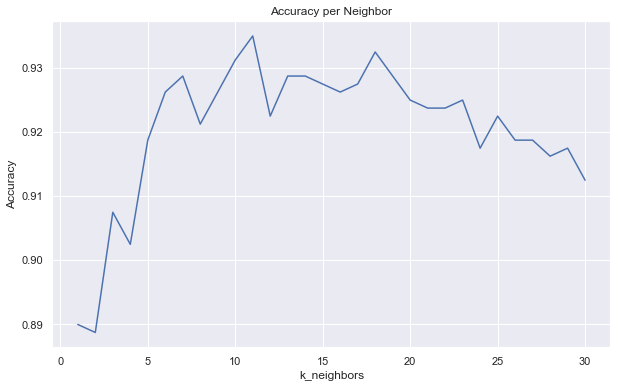

The optimal value of k is: 11
with the same accuracy of 93.5%


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)
k_values = range(1,31)
train_acc = []
test_acc = []
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))

#sns.lineplot(x=range(1,31), y=train_acc, markers=["o"])
sns.lineplot(x=range(1,31), y=test_acc, markers=[">"])
#plt.legend(["Training Accuracy","Testing Accuracy"])
plt.xlabel("k_neighbors")
plt.ylabel("Accuracy")
plt.title("Accuracy per Neighbor")
plt.show();

mxs = []
for i in range(len(test_acc)):
    if test_acc[i] == max(test_acc):
        mxs.append(i)
print(f'The optimal value of k is: {mxs[0]+1}\nwith the accuracy of {np.round(max(test_acc)*100,3)}%')

In [12]:
# we'll going to use 11 as the value of k in the succeeding implementations because
# it has higher accuracy

In [13]:
scores_mean = []
clf = KNeighborsClassifier(n_neighbors=26)
number_features = X.shape[1]
for i in range(number_features):
    scores = cross_val_score(clf, X[:,i].reshape(-1,1), y)
    scores_mean.append(scores.mean()*100)
    
dframe = pd.DataFrame(data={'Feature':np.array(df.columns[:-1]),
                            'Accuracy':scores_mean})
dframe = dframe.sort_values(by='Accuracy', ascending=False, ignore_index=True)
dframe.style.hide_index()

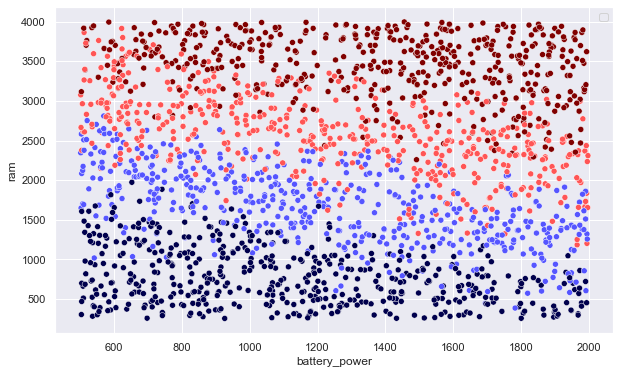

In [14]:
sns.scatterplot(x=df[dframe['Feature'][1]], y=df[dframe['Feature'][0]], hue=df['price_range'], 
                palette='seismic')
plt.legend('');
# we plotted the two most important features in a scatter plot
# ram has the highest accuracy, 2nd is battery power 

## Prediction
<a id = 'pred'></a>

In [15]:
def get_performace_measures(matrix): #accepts matrix as a parameter and returns a dataframe of score
    FP = matrix.sum(axis=0) - np.diag(matrix) 
    FN = matrix.sum(axis=1) - np.diag(matrix) 
    TP = np.diag(matrix) 
    TN = matrix.sum() - (FP + FN + TP) 
    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)
    
    TPR = np.round(TP/(TP+FN)*100,2) 
    TNR = np.round(TN/(TN+FP)*100,2) 
    PPV = np.round(TP/(TP+FP)*100,2) 
    F1 = np.round(2 * (PPV * TPR) / (PPV + TPR),2)
    
    dataframe = pd.DataFrame(data={'Recall':TPR,
                                  'Specificity':TNR,
                                  'Precision':PPV,
                                  'F1-Score':F1},
                            index=['Class 1', 'Class 2', 'Class 3', 'Class 4'])
    dataframe.fillna(value=0, inplace=True)
    return(dataframe)

In [19]:
def kNN(x, y, title, k, raw_inputs):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.40)
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    pred = clf.predict(raw_inputs)
    proba = clf.predict_proba(raw_inputs)
    
    ri = raw_inputs.reshape((-1,1))
    frame = pd.DataFrame(data=ri, index=df.columns[:-1], columns=["Specs"])
    print("Performance Measure for kNN Algorithm")
    display(get_performace_measures(metrics.confusion_matrix(y_test, y_pred)))
    
    sns.scatterplot(x=df[dframe['Feature'][1]], 
                    y=df[dframe['Feature'][0]],
                    palette='seismic',
                    hue=df['price_range'])
    plt.scatter(x=raw_inputs[0,0], y=raw_inputs[0,13], marker='*', c='g')
    plt.title(f"Scatter Plot\nPredicted Class: {pred[0]}")
    plt.legend('')
    plt.show();
    
    if pred == 0:
        print("Prediction: Low cost")
    elif pred == 1:
        print("Prediction: Medium cost")
    elif pred == 2:
        print("Prediction: High cost")
    else:
        print("Prediction: Very high cost")
    
    print("Probability: {}%".format(np.round(proba.max()*100,3)))
    display(frame)

In [20]:
samsungGTB5330 = np.array([[1200, 1, 0.85, 0, 0, 1, 4, 1.17, 112, 1, 2, 320, 240, 512, 7.62, 5.08, 5, 1, 1, 1]])

Performance Measure for kNN Algorithm


Recall  Specificity  Precision  F1-Score
Class 1   97.97        97.18      91.90     94.84
Class 2   87.82        97.68      92.51     90.10
Class 3   91.90        96.10      89.35     90.61
Class 4   91.84        98.84      96.26     94.00

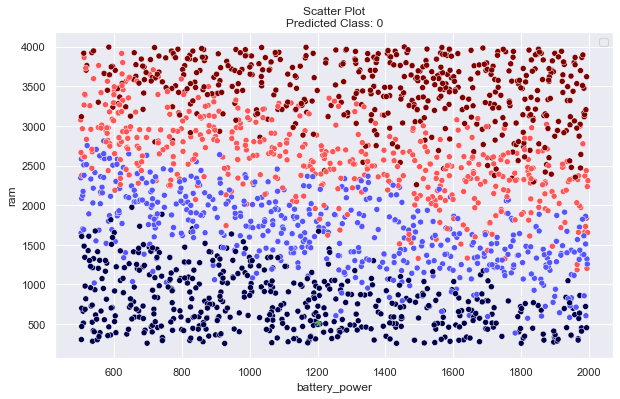

Prediction: Low cost
Probability: 100.0%


Specs
battery_power  1200.00
blue              1.00
clock_speed       0.85
dual_sim          0.00
fc                0.00
four_g            1.00
int_memory        4.00
m_dep             1.17
mobile_wt       112.00
n_cores           1.00
pc                2.00
px_height       320.00
px_width        240.00
ram             512.00
sc_h              7.62
sc_w              5.08
talk_time         5.00
three_g           1.00
touch_screen      1.00
wifi              1.00

In [21]:
kNN(X, y, "title", 11, samsungGTB5330)

# Discussion of Results

* Optimal Value of k <br>
For the k Nearest Neighbor Algorithm, distance is necessary to statistically measure the nearest points, the most dominant neighbor will be considered as the class of the unseen instance. For this particular classification problem, the optimal value of `k = 11`, gained the highest accuracy of `93%` greater than any other neighbor value.

* Most Important Feature <br>
The most important feature is identified using sensitivity analysis. The outcome suggests that the classification is being dominated by the most important features. <br>
For this classification, the most important feature is the `ram` with a relatively high accuracy of `74.35%` greater than all its counterpart, the second-highest accuracy is the `battery_power` which have `28.75%` accuracy.<br>
This information also suggests that RAM heavily contributed to the price of the mobile phone, it is evident in the kde plot that can be seen [here](#univar) where there seems to be RAM type for each class.

* Prediction <br>
The prediction can be seen [here](#pred), we used the specifications of a mobile phone that ranged only from the minimum to the maximum values that are present in the instances. <br>
The performance measure is primarily applicable to the algorithm, and the numbers are quite good for a kNN model. The scatter plot is reduced to 400 samples to recognize the new unseen instance denoted with a green star `*`.<br>
The new instance often fell to class 1 but there are also times that it falls to class 2, this time it is being considered as class 2 or the mobile phone is predicted to have a `high cost` with `54%` probability of it being part of that class.

Dataset Reference:
<a href='https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification'>Dataset Link</a> <br>
<a href="https://www.facebook.com/Jbrian.Andam/posts/1569824310042483?notif_id=1647749636147485&notif_t=feedback_reaction_generic&ref=notif">FB Post</a>